# Clustering: Sessa Empirical Estimator
## CIS 3203N GROUP 3

**Thesis Partner 1:** Dejito, Christine Ann  
**Thesis Partner 2:** Roca, Zophia Maureen  
**Date:** February 23, 2025  

---

## Introduction  
This notebook explores the **Sessa Empirical Estimator** for clustering medication adherence data using **K-Means** and **DBSCAN**. The goal is to analyze patterns in medication event intervals and evaluate the effectiveness of different clustering techniques.  

---

## Dataset used
The dataset **med.events** contains simulated medication event records for 100 patients, with the following key columns:
- **PATIENT_ID**: Unique identifier for each patient.
- **DATE**: The date of a medication event.
- **PERDAY**: Daily dosage prescribed.
- **CATEGORY**: ATC code for medication classification.
- **DURATION**: Duration of medication supply in days.

---

## Methods  
We implement and compare two clustering algorithms:  
- **K-Means Clustering**: A centroid-based clustering method that partitions data into `k` clusters.  
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: A density-based method that identifies clusters of varying shapes and handles noise effectively.  
- **Sessa Empirical Estimator**: Applied to determine the optimal number of clusters in K-Means.  

---



## Install required packages


In [27]:
!pip install --user pandas numpy scikit-learn matplotlib seaborn statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.0/9.8 MB 393.8 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.8 MB 491.5 kB/s eta 0:00:20
    --------------------------------------- 0.1/9.8 MB 722.1 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.8 MB 908.0 kB/s eta 0:00:11
   - -------------------------------------- 0.3/9.8 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.8 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.5/9.8 MB 1.2 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/9.8 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/9.8 MB 1.3 MB/s eta 0:00:08
   -- ------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


---

## Import necessary libraries


In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

---
## Implementation
### 1️⃣ Load the dataset


In [38]:
df = pd.read_csv("med_events.csv")  # Update with actual file path

df.columns = ["pnr", "eksd", "perday", "ATC", "dur_original"]
df["eksd"] = pd.to_datetime(df["eksd"])

df.head()

,pnr,eksd,perday,ATC,dur_original
0,1,2033-04-26,4,medA,50
1,1,2033-07-04,4,medB,30
2,1,2033-08-03,4,medB,30
3,1,2033-08-17,4,medB,30
4,1,2033-10-13,4,medB,30


### 2️⃣ Filter for a specific drug

In [39]:
def filter_drug(df, drug_code):
    return df[df["ATC"] == drug_code]

drug_df = filter_drug(df, "medA")

### 3️⃣ Compute event intervals

In [40]:
# Compute event intervals
def compute_event_intervals(df):
    df = df.sort_values(by=["pnr", "eksd"]).copy()
    df["prev_eksd"] = df.groupby("pnr")["eksd"].shift(1)
    df = df.dropna()
    df["event_interval"] = (df["eksd"] - df["prev_eksd"]).dt.days
    return df

drug_df = compute_event_intervals(drug_df)

### 4️⃣ Apply Sessa Empirical Estimator (ECDF)

In [41]:
def get_ecdf_cutoff(df):
    ecdf = ECDF(df["event_interval"].dropna())  
    cutoff = np.percentile(df["event_interval"], 80)  # Retain lower 80%
    return df[df["event_interval"] <= cutoff]

drug_df = get_ecdf_cutoff(drug_df)

### 5️⃣ Apply K-Means Clustering

In [94]:
def apply_kmeans(df, max_clusters=10):
    X = df[["event_interval"]].values  # Extract feature
    X_scaled = StandardScaler().fit_transform(X)  # Normalize data

    # Choose optimal K (Here, we use K=3 as a placeholder)
    best_k = 3
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    df["Cluster_KMeans"] = kmeans.fit_predict(X_scaled).astype(int)
    return df

drug_df = apply_kmeans(drug_df)

### 6️⃣ Apply DBSCAN Clustering

In [95]:
def apply_dbscan(df):
    X = df[["event_interval"]].values  # Extract feature
    X_scaled = StandardScaler().fit_transform(X)  # Normalize data

    dbscan = DBSCAN(eps=1, min_samples=5)  # Adjust parameters if needed
    df["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled).astype(int)
    return df

drug_df = apply_dbscan(drug_df)

### 7️⃣ Visualize Clustering Results

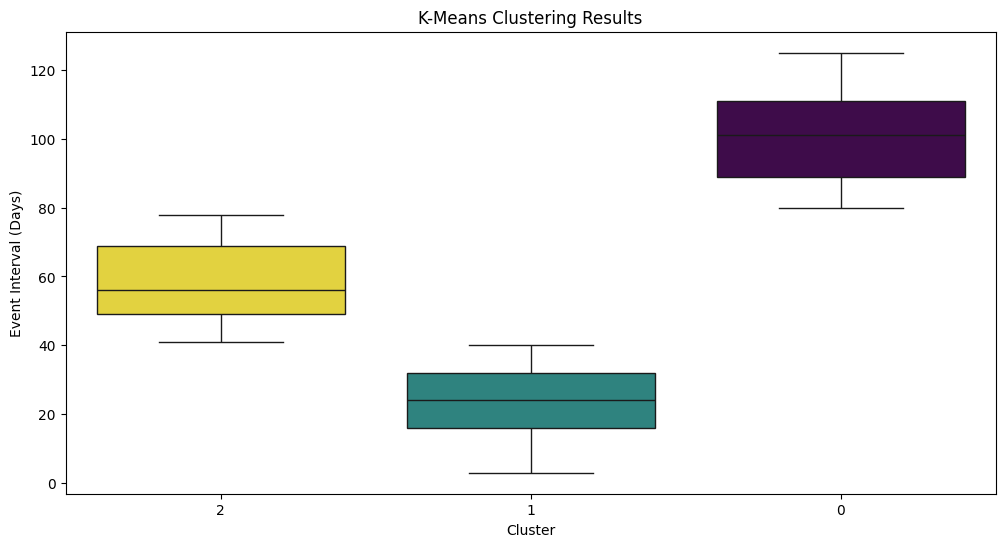

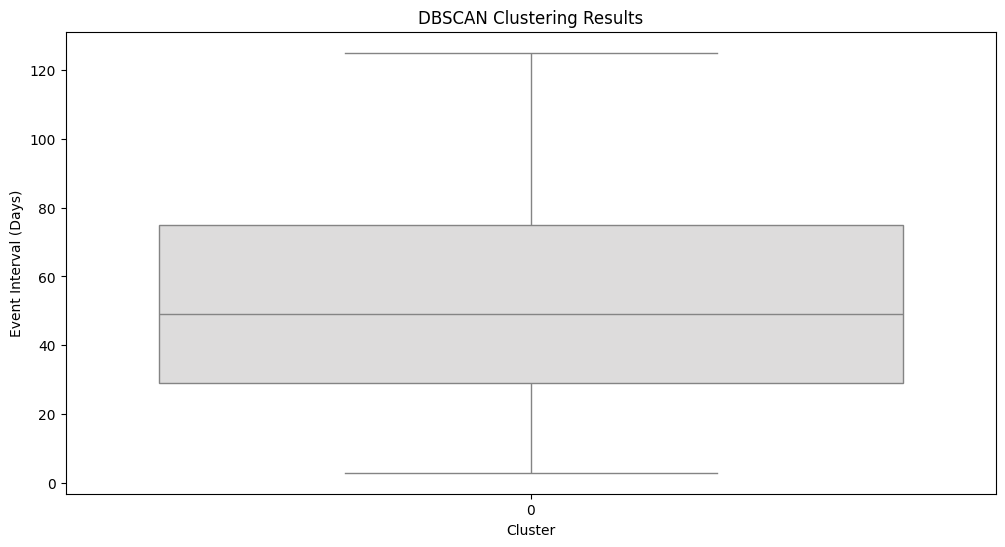

In [96]:
def plot_clusters(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["Cluster_KMeans"].astype(str), y=df["event_interval"], hue=df["Cluster_KMeans"], palette="viridis", legend=False)
    plt.xlabel("Cluster")
    plt.ylabel("Event Interval (Days)")
    plt.title("K-Means Clustering Results")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["Cluster_DBSCAN"].astype(str), y=df["event_interval"], hue=df["Cluster_DBSCAN"], palette="coolwarm", legend=False)
    plt.xlabel("Cluster")
    plt.ylabel("Event Interval (Days)")
    plt.title("DBSCAN Clustering Results")
    plt.show()

# Plot Results
plot_clusters(drug_df)

### 8️⃣ Display Final Data

In [97]:
drug_df.head()

,pnr,eksd,perday,ATC,dur_original,prev_eksd,event_interval,Cluster_KMeans,Cluster_DBSCAN
25,2,2036-03-10,4,medA,50,2036-01-20,50,2,0
63,4,2033-08-30,4,medA,50,2033-08-20,10,1,0
64,4,2033-12-17,4,medA,50,2033-08-30,109,0,0
67,5,2031-12-27,8,medA,30,2031-10-26,62,2,0
68,5,2032-01-25,8,medA,30,2031-12-27,29,1,0
